In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir =  tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir=".", untar=True)

In [13]:
data_dir

'.\\datasets\\flower_photos'

In [14]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [17]:
list(data_dir.glob("*/*/*.jpg"))[:5]

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [18]:
image_count = len(list(data_dir.glob("*/*/*.jpg")))
image_count

3670

In [21]:
roses = list(data_dir.glob("*/roses/*.jpg"))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

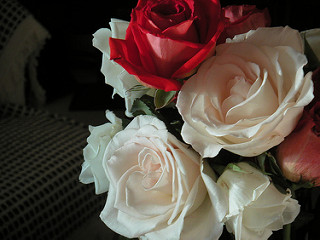

In [25]:
PIL.Image.open(roses[1])

In [26]:
tulips = list(data_dir.glob("*/tulips/*.jpg"))
tulips[:5]

[WindowsPath('datasets/flower_photos/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

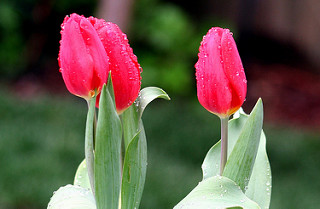

In [27]:
PIL.Image.open(tulips[0])

In [33]:
flowers_images_dict = {
    'roses': list(data_dir.glob('*/roses/*')),
    'daisy': list(data_dir.glob('*/daisy/*')),
    'dandelion': list(data_dir.glob('*/dandelion/*')),
    'sunflowers': list(data_dir.glob('*/sunflowers/*')),
    'tulips': list(data_dir.glob('*/tulips/*')),
}
flowers_images_dict["dandelion"][:5]

[WindowsPath('datasets/flower_photos/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/dandelion/10443973_aeb97513fc_m.jpg')]

In [34]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [35]:
img = cv2.imread(flowers_images_dict["roses"][0])

In [36]:
img.shape

(240, 179, 3)

In [38]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [52]:
X,y = [],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(image)
        resize_img = cv2.resize(img,(180,180))
        X.append(resize_img)
        y.append(flowers_labels_dict[flower_name])

In [58]:
X = np.array(X)
y = np.array(y)

In [59]:
X 

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [61]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [62]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.3137 - loss: 1.5870
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.6043 - loss: 1.0333
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.6851 - loss: 0.8264
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.7857 - loss: 0.5778
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.8848 - loss: 0.3615
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.9347 - loss: 0.2150
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.9665 - loss: 0.1142
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.9658 - loss: 0.1165
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.9880 - loss: 0.0450
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.9917 - loss: 0.0423
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.9967 - loss: 0.0194
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11

In [63]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6495 - loss: 2.3058


[2.186368942260742, 0.6612200140953064]

In [66]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[  4.423318 ,  14.417332 ,  -3.227339 , -26.567396 , -13.541621 ],
       [  6.6040635,   0.1024508,  -9.41846  ,  -6.8104596,   3.8495357],
       [ -5.686182 ,   0.5709032,  14.230464 , -14.248437 ,  -7.7651353],
       ...,
       [ -3.6225116, -12.760969 ,  -8.283118 ,   3.3149266,   2.7420478],
       [  1.5416412,   4.494399 ,  -4.824603 ,  -3.0774693,  -4.3091235],
       [ -1.2579849, -13.451607 ,   1.5507846,   5.1368065,   2.1007645]],
      dtype=float32)

In [67]:
score = tf.nn.softmax(predictions[0])

In [68]:
np.argmax(score)

np.int64(1)

In [69]:
y_test[0]

np.int64(1)

In [70]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'